In [1]:
"""
==============================================================
SVM Demonstration: Classifying Beer and Wine
==============================================================

Artificial Intelligence / Machine Learning / Support Vector Machine

--- CRISP-DM PHASE 1: BUSINESS UNDERSTANDING ---
The core business goal is classification (distinguishing between two product types).
The technical goal is to implement an SVM pipeline for this task.

Process:
1. Create synthetic data for two "beverage types": beer and wine
2. Prepare the data (train/test split + scaling)
3. Train two SVM models (linear and RBF)
4. Evaluate the models
5. Visualize the decision boundaries

Classic example demonstrating:
- what a machine learning pipeline looks like
- what an SVM does
- what data can look like in two dimensions
- what a decision boundary can look like in different models
"""

# -------------------------------------------------------------------
# Import Libraries
# --- CRISP-DM PHASE 2 for DATA UNDERSTANDING (Tool preparation)
# --- CRISP-DM PHASE 3 for DATA PREPARATION (Tool preparation)
# --- CRISP-DM PHASE 4 for MODELING (Algorithm preparation)
# --- CRISP-DM PHASE 5 for EVALUATION (Metrics preparation)
# -------------------------------------------------------------------

# Numerical calculations
import numpy as np

# For easy table handling
import pandas as pd

# For plotting graphs
import matplotlib.pyplot as plt

# Machine learning from scikit-learn
from sklearn.svm import SVC                    # The SVM model (PHASE 4)
from sklearn.preprocessing import StandardScaler # For data scaling (PHASE 3)
from sklearn.model_selection import train_test_split # (PHASE 3)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # (PHASE 5)

# For creating synthetic (artificial) data
from sklearn.datasets import make_blobs # (PHASE 2/3)

In [2]:
# -------------------------------------------------------------------
# 1. Create synthetic data (2D)
# --- CRISP-DM PHASE 2: DATA UNDERSTANDING ---
# This step involves initial data collection and exploration (creating/inspecting data structure).
# -------------------------------------------------------------------
"""
Creates two clusters: Beer and wine

Each data point has two features:
  1. alcohol content (approximate simulation)
  2. bitterness (arbitrary unit)

NOTE: Not real-world measurements — constructed for this demo, only.
"""

rng = np.random.RandomState(42)  # For getting the same result every time in this demo 

# create data clusters of points which will be spherical in nature
X, y = make_blobs(
    n_samples=400,
    centers=[(-1.5, 0.0), (1.5, 0.5)],  # center for beer and wine, respectively
    cluster_std=[1.0, 1.0],             # how spread out the points are
    random_state=rng
)

# Transform the abstract features into realistic numbers for 'alcohol' (5-7.5%) and 'bitterness' (20-28 IBU) ranges.
alcohol = 5 + (X[:, 0] * 2.5)     
bitterness = 20 + (X[:, 1] * 8)

# Create a table with (for us) readable values
df = pd.DataFrame({
    "alcohol": np.round(alcohol, 2),
    "bitterness": np.round(bitterness, 2),
    "label": np.where(y == 0, "beer", "wine")
})

print(df)

## If you want to see all data, insert this before the printout
# import pandas as pd
## Set options to display all rows and columns
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)


     alcohol  bitterness label
0       9.60       20.68  wine
1       7.62       28.98  wine
2       7.44       32.39  wine
3       8.82       24.24  wine
4       6.28       22.99  wine
..       ...         ...   ...
395     3.12       24.88  beer
396     2.95       17.52  beer
397    -1.63       23.01  beer
398     2.57       17.62  wine
399    -2.19       12.50  beer

[400 rows x 3 columns]


In [3]:
# -------------------------------------------------------------------
# 2. Prepare data for machine learning
# --- CRISP-DM PHASE 3: DATA PREPARATION ---
# This phase involves cleaning, constructing, integrating, and formatting data.
# -------------------------------------------------------------------
"""
Supervised Machine learning requires:
1. Features (X) — what the model uses to predict i.e. the independent variables
2. Target variable (y) — what the model is trying to predict, i.e. the target aka the dependent variable

We also split the data into:
  - training data (what the model learns from)
  - test data (what the model is evaluated on)
"""

X_feat = df[["alcohol", "bitterness"]].values # Selecting features
y_bin = np.where(df["label"] == "beer", 0, 1)  # Mapping target to binary (Formatting)

# 25 % of the data is used for testing (Splitting)
# Return: X_train which are 75% of the features, X_test which is 25% of the features, y_train is the training targets, y_test is the test targets
X_train, X_test, y_train, y_test = train_test_split(
    X_feat, y_bin, test_size=0.25, random_state=42, stratify=y_bin
)

In [4]:
#print(df["label"] == "beer")
#print(np.where(df["label"] == "beer", 0, 1))
# XXXX
%whos

Variable                Type           Data/Info
------------------------------------------------
SVC                     ABCMeta        <class 'sklearn.svm._classes.SVC'>
StandardScaler          type           <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                       ndarray        400x2: 800 elems, type `float64`, 6400 bytes
X_feat                  ndarray        400x2: 800 elems, type `float64`, 6400 bytes
X_test                  ndarray        100x2: 200 elems, type `float64`, 1600 bytes
X_train                 ndarray        300x2: 600 elems, type `float64`, 4800 bytes
accuracy_score          function       <function accuracy_score at 0x0000021091B13A60>
alcohol                 ndarray        400: 400 elems, type `float64`, 3200 bytes
bitterness              ndarray        400: 400 elems, type `float64`, 3200 bytes
classification_report   function       <function classification_<...>rt at 0x0000021091B44E00>
confusion_matrix        function       <function co

In [10]:
print(X_test)

[[ 9.57 13.99]
 [ 2.55 32.26]
 [-0.65 21.2 ]
 [ 3.23 12.72]
 [ 0.87 24.71]
 [-1.41 23.79]
 [12.56 28.31]
 [-2.07 21.57]
 [ 9.22 17.96]
 [-3.06 15.5 ]
 [ 1.22 11.54]
 [16.45 32.96]
 [ 0.7  22.86]
 [ 3.64 25.21]
 [ 8.17 29.57]
 [-0.54 25.44]
 [-2.05 34.65]
 [ 7.89 21.03]
 [10.3  11.44]
 [ 7.47 15.53]
 [ 7.6  17.2 ]
 [-1.52 10.43]
 [ 6.22 10.76]
 [11.09 34.17]
 [ 0.96 29.9 ]
 [12.97 31.05]
 [ 8.43 16.36]
 [-2.77 21.48]
 [ 3.31 10.23]
 [-2.19 12.5 ]
 [ 1.77  4.32]
 [ 3.12 24.88]
 [ 8.08 16.17]
 [ 2.1  35.01]
 [ 8.56 28.97]
 [ 3.54 22.63]
 [ 2.55 22.38]
 [10.15 32.65]
 [ 1.85  4.69]
 [12.51 24.59]
 [ 9.7  28.88]
 [ 0.13 26.85]
 [ 1.07 28.03]
 [ 6.56 12.94]
 [ 4.73 25.63]
 [ 2.49 18.89]
 [ 8.97 22.75]
 [ 3.83 27.45]
 [ 0.96 17.59]
 [ 6.86 12.62]
 [ 8.48 15.72]
 [ 1.68 23.08]
 [10.04 18.19]
 [-0.25 17.67]
 [10.   16.18]
 [ 4.15 13.76]
 [ 1.16 32.52]
 [ 2.54 24.11]
 [ 5.53 13.64]
 [ 5.79  7.69]
 [ 7.12 20.1 ]
 [ 6.84  9.56]
 [ 3.58 23.29]
 [ 8.15 16.74]
 [ 1.26 18.12]
 [ 1.31 23.98]
 [ 1.82 30

In [6]:
# -------------------------------------------------------------------
# 3. Data Scaling
# --- CRISP-DM PHASE 3: DATA PREPARATION (Transformation) ---
# Transforming data to improve model performance.
# -------------------------------------------------------------------
"""
Why scale?

SVM works best when the features have a similar scale.
Otherwise, e.g., "alcohol" might dominate "bitterness" just due to size difference.

Standardisation aka Z-score normalization is used here:
StandardScaler ensures that:
- mean = 0
- standard deviation = 1

This doesn't change the shape of the clusters.
"""

scaler = StandardScaler().fit(X_train)

X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

In [7]:
# -------------------------------------------------------------------
# 4. Train two different SVM models
# --- CRISP-DM PHASE 4: MODELING ---
# This phase involves selecting techniques, generating, and building models.
# -------------------------------------------------------------------
"""
We train two versions:
1. Linear SVM — good when data can be separated by a straight line
2. RBF SVM — good when the boundary needs to be curved or complex

C and gamma are hyperparameters:
- C : how much the model is "penalized" for misclassifications
- gamma : how far a data point's influence extends in space
"""

svm_lin = SVC(kernel="linear", C=1.0, probability=True)
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale", probability=True)

svm_lin.fit(X_train_s, y_train) # Training the Linear Model
svm_rbf.fit(X_train_s, y_train) # Training the RBF Model

SVC(probability=True)

=== Linear SVM ===
Accuracy: 0.92
Confusion Matrix:
 [[48  2]
 [ 6 44]]
              precision    recall  f1-score   support

        beer       0.89      0.96      0.92        50
        wine       0.96      0.88      0.92        50

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


=== RBF SVM ===
Accuracy: 0.91
Confusion Matrix:
 [[48  2]
 [ 7 43]]
              precision    recall  f1-score   support

        beer       0.87      0.96      0.91        50
        wine       0.96      0.86      0.91        50

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



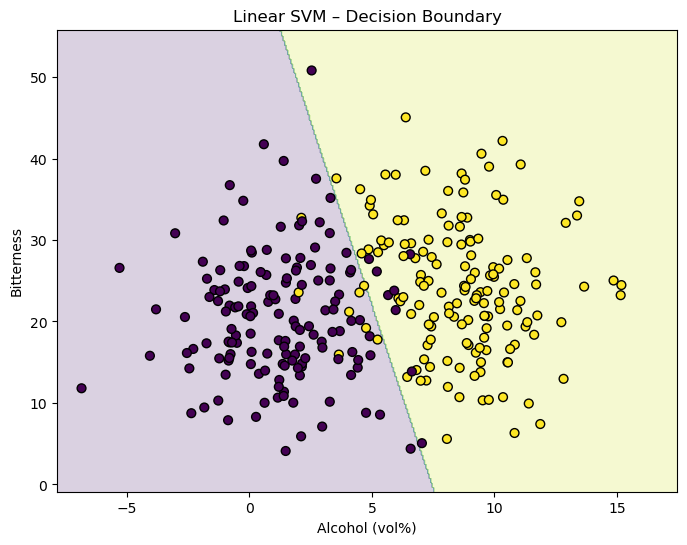

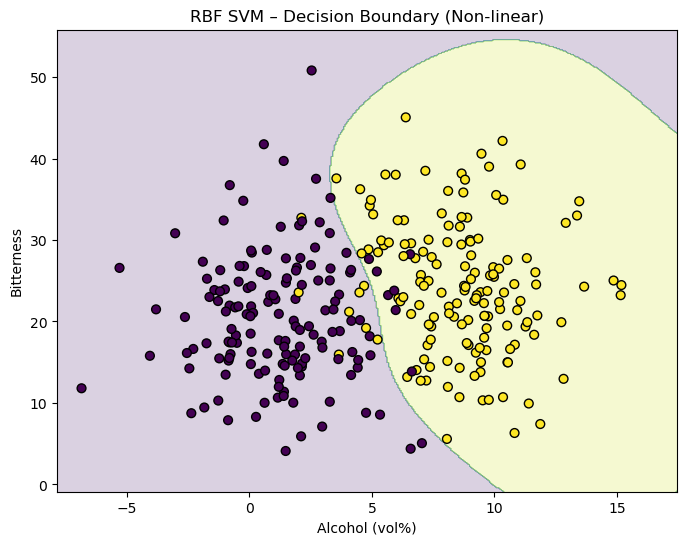

In [8]:
# -------------------------------------------------------------------
# 5. Evaluate the models
# --- CRISP-DM PHASE 5: EVALUATION ---
# This phase involves assessing the model's performance and reviewing the process.
# -------------------------------------------------------------------
"""
We test the models (SVMs) on the test data that they have NEVER seen before.

Metrics we look at:
** Accuracy: proportion of correct guesses
- Precision and recall: more detailed metrics
** Confusion matrix: shows which classes were guessed incorrectly
"""

# Linear
y_pred_lin = svm_lin.predict(X_test_s)
# RBF
y_pred_rbf = svm_rbf.predict(X_test_s)

print("=== Linear SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lin))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin, target_names=["beer", "wine"]))

print("\n=== RBF SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf, target_names=["beer", "wine"]))

# -------------------------------------------------------------------
# 6. Visualize Decision Boundaries
# --- CRISP-DM PHASE 5 (EVALUATION) & PHASE 6 (DEPLOYMENT) ---
# Visualization aids evaluation and is key to deploying/presenting results.
# -------------------------------------------------------------------
"""
The function below plots:

- all our data points
- the line (or shape) that the SVM uses to separate classes

"""

def plot_decision_boundary(clf, scaler, X_train, y_train, X_full, title):

    # Create a grid (like laying graph paper over the plot)
    x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
    y_min, y_max = X_full[:, 1].min() - 5, X_full[:, 1].max() + 5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    # Transform the grid into a format the SVM model understands
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_s = scaler.transform(grid)

    # Let the model guess the entire grid
    Z = clf.predict(grid_s)
    Z = Z.reshape(xx.shape)

    # Plot everything
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", s=40)
    plt.xlabel("Alcohol (vol%)")
    plt.ylabel("Bitterness")
    plt.title(title)
    plt.show()


# Plot both models
plot_decision_boundary(svm_lin, scaler, X_train, y_train, X_feat, "Linear SVM – Decision Boundary")
plot_decision_boundary(svm_rbf, scaler, X_train, y_train, X_feat, "RBF SVM – Decision Boundary (Non-linear)")